**Two particles in a box of length $L = 1$, with 100 grid points**


First testing interacting method with v_int = 0, then compare with non interacting method.

For a particle in a box, the energy eigenvalues of a single particle state are given by $\epsilon_{k} = \frac{\pi^{2}}{2} (k+1)^2$ in atomic units, $L = 1$ and for $k = 0, 1, \dots$  with $k = 0$ being the ground state of the system.

This gives a simple $\frac{(k+1)^2}{2}$ relation if we write energy in terms of $\pi^2$.

Thus $\epsilon_{0} = 0.5, \epsilon_{1} = 2, \epsilon_{2} = 4.5$ etc 

This energy eigenvalue solves equation $H_{s}\psi_{k} = \epsilon_{k}\psi_{k}$. 

However when calling `iDEA.methods.interacting.solve`, the energy given out is the eigenvalue of $H_{MB} \phi = E_{k} \phi$, but for a system like a particle in a box, we know that analytically the ground state should be $E_{0} = 2\epsilon_{0}= 1$ and can draw out other states.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA

In [20]:
# initalise the system 

l = 1
x = np.linspace(0, l, 100)
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")
pib_double = iDEA.system.System(x, v_ext, v_int, electrons = "ud")

In [3]:
energies_int = []
for i in range(10):
    state = iDEA.methods.interacting.solve(pib, k=i)
    current_energy = state.energy / (np.pi)**2
    energies_int.append(current_energy)
    # state = iDEA.methods.non_interacting.solve(pib, k=i)
    # e = iDEA.methods.non_interacting.total_energy(pib, state)
    # energies_non_int.append(e)
print("Done")

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
Done


State = 0, energy = 0.9649407191079199 per pi squared
State = 1, energy = 2.412351383172486 per pi squared
State = 2, energy = 2.4123513831741836 per pi squared
State = 3, energy = 3.859762047237716 per pi squared
State = 4, energy = 4.824701104185403 per pi squared
State = 5, energy = 4.824701104185359 per pi squared
State = 6, energy = 6.272111768250473 per pi squared
State = 7, energy = 6.272111768250526 per pi squared
State = 8, energy = 8.201987790258954 per pi squared
State = 9, energy = 8.201987790260395 per pi squared


Text(0, 0.5, 'Energies')

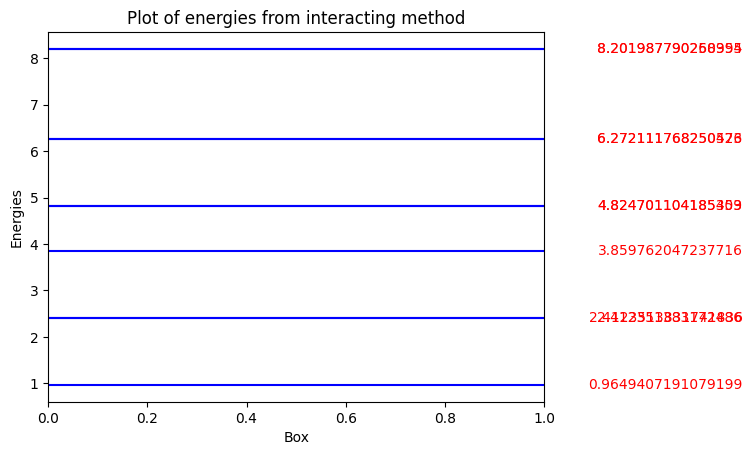

In [6]:
plt.figure()

for i, value in enumerate(energies_int):
    plt.axhline(y=value, color='b', linestyle='-')
    plt.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")

# Add title and labels
plt.title('Plot of energies from interacting method')
plt.xlabel('Box')
plt.ylabel('Energies')

Inital observations show that the energy of the states of the system seem to be ordered, however there are some degeneracies i.e. between the 1st excited state and the 2nd excited state, which is not predicted. There is also large errors between the analytical solution and the solution given by iDEA.

In [25]:
state_1 = iDEA.methods.non_interacting.solve(pib_double, k=0)
state_2 = iDEA.methods.non_interacting.solve(pib_double, k=1)
help(state_1)
# print(f"1st Excited State (Up) = {state_1.up.occupations[:3]}")
# print(f"1st Excited State (Down) = {state_1.down.occupations[:3]}")
# print(f"2nd Excited State (Up) = {state_1.up.occupations[:3]}")
# print(f"2nd Excited State (Down) = {state_1.down.occupations[:3]}")
print(state_1.down.energies[0] / (np.pi)**2)
print(state_2.up.energies[1] / (np.pi)**2)
print(state_2.down.occupied)

iDEA.methods.non_interacting.solve: convergence = 2.6193e-13, tolerance = 1e-10
iDEA.methods.non_interacting.solve: convergence = 2.6193e-13, tolerance = 1e-10
Help on SingleBodyState in module iDEA.state object:

class SingleBodyState(State)
 |  State of particles in a single-body state.
 |
 |  This is described by three arrays for each spin channel:
 |
 |  | up.energies: np.ndarray, Array of single-body energies, indexed as energies[orbital_number].
 |  | up.orbitals: np.ndarray, Array of single-body orbitals, indexed as orbitals[space,orbital_number].
 |  | up.occupations: np.ndarray, Array of single-body occupations, indexed as occupations[orbital_number].
 |  | up.occupied: np.ndarray, Indices of up.occupations that are non-zero, to indicate occupied orbitals.
 |
 |  | down.energies: np.ndarray, Array of single-body energies, indexed as energies[orbital_number].
 |  | down.orbitals: np.ndarray, Array of single-body orbitals, indexed as orbitals[space,orbital_number].
 |  | down.oc

It seems like iDEA places the up and down electron in the exact same configuration for both the 1st and 2nd excited state which does not make sense to me. 

I may be misunderstanding something fundamental here.